## Introduction

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Read on or watch the video below to explore more details. Once you’re ready to start competing, click on the Join Competition button to create an account and gain access to the competition data. Then check out Alexis Cook’s Titanic Tutorial that walks you through step by step how to make your first submission!

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

import matplotlib.pyplot as plt
import seaborn as sns

# machine learning algos used
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]

In [3]:
print("Diamensions of data dataset",data.shape)
print("Diamensions of test dataset",test.shape)

Diamensions of data dataset (891, 12)
Diamensions of test dataset (418, 11)


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:

def clean(data):
    data = data.drop(["Name","Ticket","Cabin","PassengerId"], axis=1)
    
    cols = ["SibSp","Parch","Fare","Age"]
    for col in cols:
        data[col].fillna(np.mean(data[col]),inplace=True)
        
    data.Embarked.fillna("U", inplace=True)
    return data
        

In [11]:
data = clean(data)
test = clean(test)

In [12]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

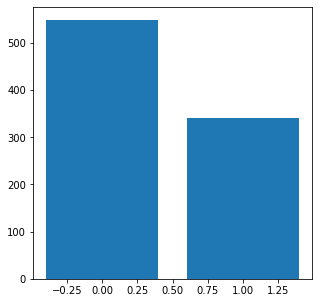

In [14]:
plt.figure(figsize=(5,5))
plt.bar(list(data['Survived'].value_counts().keys()),list(data['Survived'].value_counts()))

No class imbalance for the dependent variable

In [15]:
data['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
30.000000     25
19.000000     25
21.000000     24
25.000000     23
36.000000     22
29.000000     20
35.000000     18
32.000000     18
26.000000     18
27.000000     18
31.000000     17
16.000000     17
34.000000     15
20.000000     15
23.000000     15
33.000000     15
39.000000     14
40.000000     13
17.000000     13
42.000000     13
45.000000     12
38.000000     11
4.000000      10
2.000000      10
50.000000     10
44.000000      9
47.000000      9
48.000000      9
54.000000      8
9.000000       8
1.000000       7
51.000000      7
37.000000      6
52.000000      6
41.000000      6
3.000000       6
14.000000      6
49.000000      6
58.000000      5
15.000000      5
43.000000      5
62.000000      4
56.000000      4
8.000000       4
60.000000      4
11.000000      4
5.000000       4
6.000000       3
7.000000       3
65.000000      3
61.000000      3
46.000000      3
10.000000      2
64.000000     

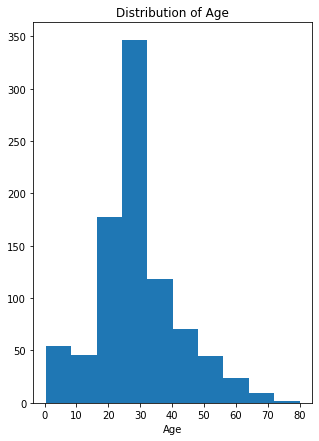

In [16]:
plt.figure(figsize=(5,7))
plt.hist(data['Age'])
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.show()

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex","Embarked"]

for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    print(le.classes_)
    
data.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = data["Survived"]
X = data.drop("Survived", axis=1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=1)

In [19]:
X_val.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
clf = LogisticRegression(random_state=1,max_iter=1000).fit(X_train, y_train)

In [21]:
predictions = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val,predictions)

0.7988826815642458

In [22]:
submission_preds = clf.predict(test)

In [23]:
df = pd.DataFrame({"PassengerId":test_ids.values,
                   "Survived": submission_preds,
                  })

In [24]:
df.to_csv("submission_1.csv", index=False)

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


print('Mean Absolute Error of logistic regression:',mean_absolute_error(predictions, y_val))
print('Mean Square Error of logistic regression:', mean_squared_error(predictions, y_val))
print('R_Squared Score of logistic regression:', r2_score(predictions, y_val))

Mean Absolute Error of logistic regression: 0.2011173184357542
Mean Square Error of logistic regression: 0.2011173184357542
R_Squared Score of logistic regression: 0.15098814229249014


In [26]:
from sklearn.metrics import classification_report

print( classification_report(y_val, predictions,target_names=["Survived","Not Survived"]) )

              precision    recall  f1-score   support

    Survived       0.82      0.85      0.83       106
Not Survived       0.77      0.73      0.75        73

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



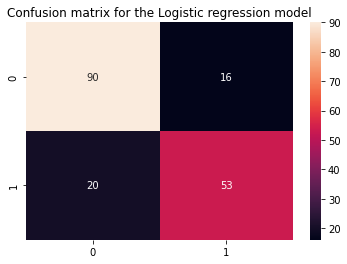

True positive values :  53
True negative values :  90
False positive values :  16
False negative values :  20


In [27]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
M = confusion_matrix(y_val, predictions)
tn, fp, fn, tp = M.ravel() 
sns.heatmap(M,annot=True)
plt.title('Confusion matrix for the Logistic regression model')
# plot_confusion_matrix(clf, X_val, predictions)
plt.show()
print("True positive values : ",tp)
print("True negative values : ",tn)
print("False positive values : ",fp)
print("False negative values : ",fn)

Improvements

Shape of X before SMOTE: (891, 7)
Shape of X after SMOTE: (1098, 7)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70460D+02    |proj g|=  4.77571D+03

At iterate   50    f=  3.54353D+02    |proj g|=  3.02199D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     91    102      1     0     0   1.345D-01   3.513D+02
  F =   351.29147590918114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Accuracy = 0.82
Recall = 0.84



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


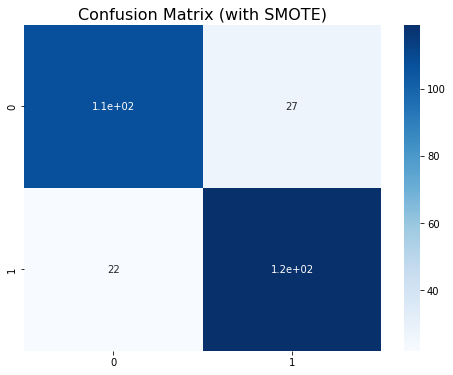

In [37]:
import imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = LogisticRegression(verbose=1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');


In [28]:
#Feature selection using Recursive feature elimination
from sklearn.feature_selection import RFE

#Select the best feature 
rfe = RFE(clf, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False False  True]
[1 1 3 2 4 5 1]


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_val)
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results = model_results.append(model_results, ignore_index = True)
model_results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression RFE (Lasso),0.798883,0.768116,0.726027,0.746479
1,Logistic Regression RFE (Lasso),0.798883,0.768116,0.726027,0.746479


In [30]:

#Predicting Test set
y_pred = classifier.predict(X_val)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_val,y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val,y_pred)
results = pd.DataFrame([['Logistic Regression (Lasso)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.798883,0.768116,0.726027,0.746479


In [31]:
# scaling the test data set

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_val)


In [32]:
def models(X_train, Y_train):

# use logestic regration 

    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
# use kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
# use SVC 
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
#use GassianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

#use dessision tree 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
#use random forest 
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    print('LogisticRegression', log.score(X_train, Y_train))
    print('KNeighborsClassifier',knn.score(X_train, Y_train))
    print('SVC',svc_rbf.score(X_train, Y_train))
    print('GaussianNB',gauss.score(X_train, Y_train))
    print('DecisionTreeClassifier',tree.score(X_train, Y_train))
    print('RandomForestClassifier',forest.score(X_train, Y_train))

    return log, knn, svc_rbf, gauss, tree, forest


In [33]:
model = models(X_train, y_train)

LogisticRegression 0.7963483146067416
KNeighborsClassifier 0.8623595505617978
SVC 0.8581460674157303
GaussianNB 0.7963483146067416
DecisionTreeClassifier 0.9873595505617978
RandomForestClassifier 0.9775280898876404


Decision Tree Classifier gave the highest accuracy score.